<u><i><center><font size = 6; color = red>STUDY EFFICIENCY ANALYSIS</font></center></i></u>

# Table of content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Data and packages import](#0)<br>
2.  [Data cleaning](#1)<br>
3.  [Data Inspection](#2) <br>
4.  [Data Visualization](#3) <br>
5.  [Linear Regression](#4) <br>
6.  [Results Evaluation](#5) <br>
    </div>


# 1) Data & Packages import <a id="0"></a>

In [3]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#data import
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


# 2) Data Cleaning <a id="1"></a>

In [11]:
#null inspection
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [126]:
df.select_dtypes("int")

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [34]:
df.select_dtypes("object")

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No
...,...
9995,Yes
9996,Yes
9997,Yes
9998,Yes


**CONVERT EXTRACURRICULAR ACTIVITIES COLUMN TO INT TYPES**

In [127]:
df['Extracurricular Activities'] = np.where(df['Extracurricular Activities'] == "Yes", 1, 0)
df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int32

# 3) Data Inspection <a id="2"></a>

In [29]:
df.shape

(10000, 6)

In [30]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# Data Visualization <a id="3"></a>

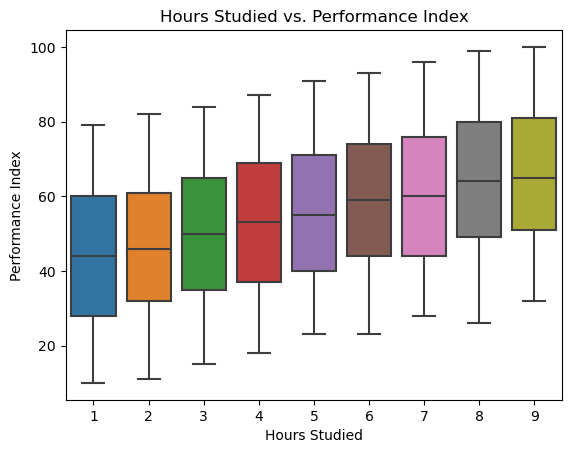

In [68]:
#Hours Studied vs. Performance Index
sns.boxplot(x= df['Hours Studied'], y = df['Performance Index'])

#labels
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')

#display
plt.show()

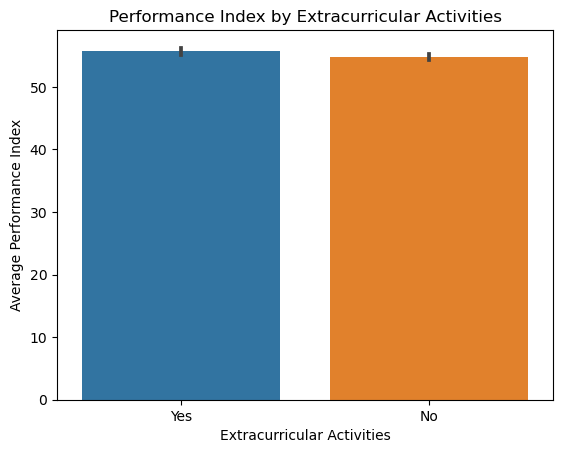

In [70]:
# Bar Plot: Average Performance Index for Extracurricular Activities
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df)

#data label
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')

#display
plt.show()

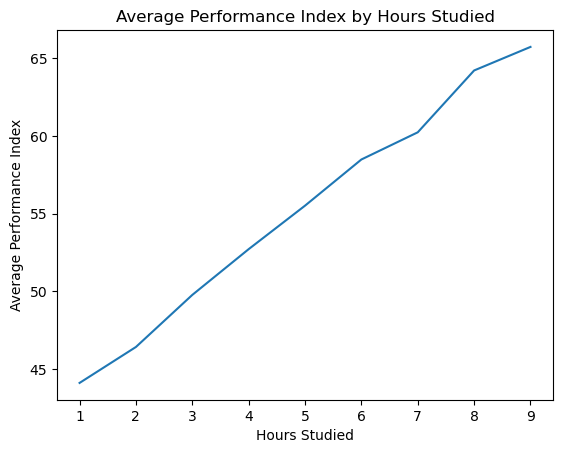

In [71]:
#Average performance index vs performance study
avg_performance_by_hours = df.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)

#label
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')

#display
plt.show()

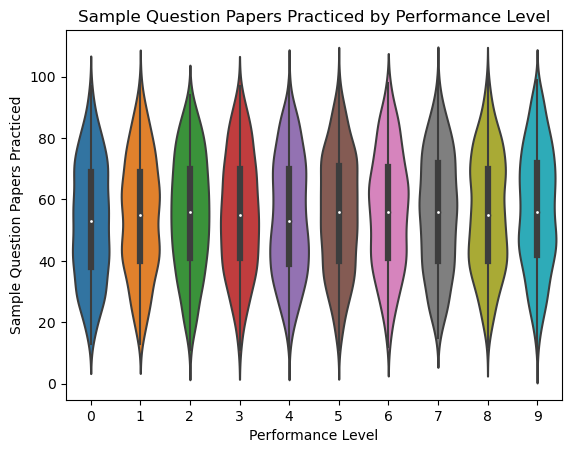

In [9]:
#sample question vs performance level
sns.violinplot(y='Performance Index', x='Sample Question Papers Practiced', data=df)

#label
plt.xlabel('Performance Level')
plt.ylabel('Sample Question Papers Practiced')
plt.title('Sample Question Papers Practiced by Performance Level')

#display
plt.show()

<AxesSubplot:>

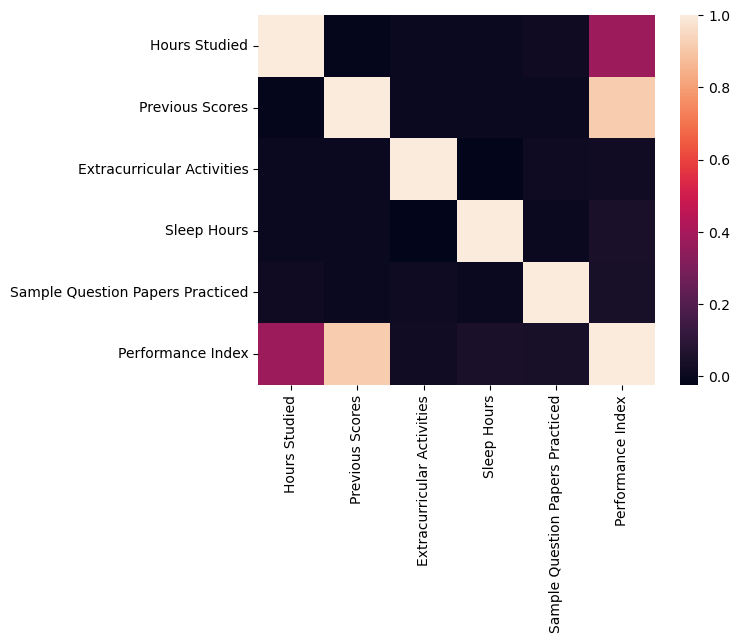

In [74]:
#Correlation Matrix
sns.heatmap(df.corr())

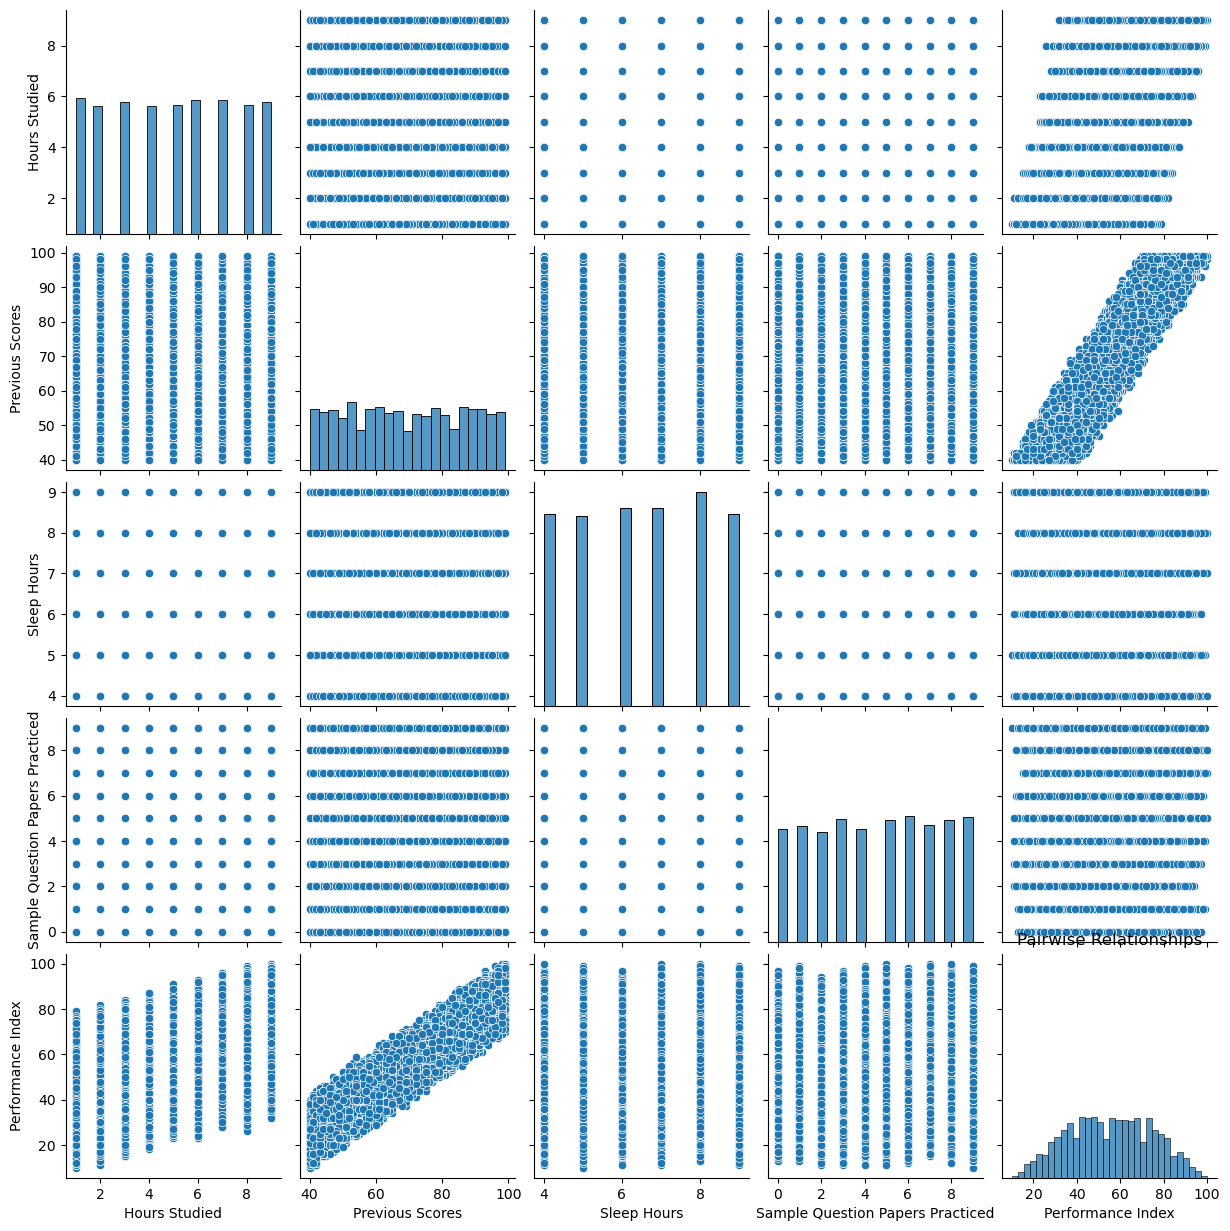

In [11]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise Relationships')
plt.show()

# 4) Linear Regression <a id="4"></a>

In [128]:
# Splitting data into Indipendent and Dependent Variable
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [129]:
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [130]:
# Splitting data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [132]:
# Training a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# V) Results Evaluation <a id="5"></a>

In [133]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [134]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [135]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)

In [136]:
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)

Mean Squared Error :  4.0826094
R Square :  0.9889833422235986


In [137]:
print(regressor.coef_)
print(regressor.intercept_)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.92194621555627


Therefore, the equation of our multiple linear regression model is:

Student Performance = 2.85×Hours Studied + 1.02×Previous Scores + 0.61×Extracurricular Activities + 0.48×Sleep Hours + 0.19×Sample Question Papers Practiced - 33.92
With the R-square is 0.988